In [1]:
import pandas as pd 
import numpy as np

In [2]:
data= pd.read_csv(r'../dataprocessed/datos_preprocesados_2.csv')
data

,model_name,Price (Dollar),Storage (GB),review,timestamp,stars,country,language,tk_review,timestamp_nanosec,normalized_timestamp_nanosec,timestamp_formatted
0,iPhone XS,182.00,64,i received the phone within 2 days of ordering...,2022-02-05,1,the United States,en,"['received', 'phone', 'within', 'day', 'orderi...",1644019200000000000,0,01/01/1970
1,iPhone XS Max,234.95,64,6 months later update - still acts like i boug...,2019-12-20,5,the United States,en,"['month', 'later', 'update', 'still', 'act', '...",1576800000000000000,0,01/01/1970
2,iPhone 15 Plus,1098.95,128,phone is great but the price is $200 above msr...,2023-11-27,1,the United States,en,"['phone', 'great', 'price', '200', 'msrp', 're...",1701043200000000000,0,01/01/1970
3,iPhone 11,599.00,64,"fast shipping, very nice phone!\nread more",2020-07-28,5,the United States,en,"['fast', 'shipping', 'nice', 'phone', 'read']",1595894400000000000,0,01/01/1970
4,iPhone 12 Pro,840.13,128,amazing defenitly worth it\nread more,2020-11-05,5,the United States,en,"['amazing', 'defenitly', 'worth', 'read']",1604534400000000000,0,01/01/1970
...,...,...,...,...,...,...,...,...,...,...,...,...
585,iPhone XR,168.39,64,got it to replace my 13 year olds xr in a pinc...,2024-09-15,5,the United States,en,"['got', 'replace', 'year', 'old', 'pinch', 'ba...",1726358400000000000,157161600000000000,25/12/1974
586,iPhone XR,181.00,64,my little niece is so inlove with this phone😌 ...,2024-09-18,5,the United States,en,"['little', 'niece', 'inlove', 'phone', 'brough...",1726617600000000000,157420800000000000,28/12/1974
587,iPhone XR,181.00,64,great buy\nread more,2024-09-20,5,the United States,en,"['great', 'buy', 'read']",1726790400000000000,157593600000000000,30/12/1974
588,iPhone XR,168.39,64,"hey guys, so i ordered this phone on the 19th ...",2024-09-22,5,the United States,en,"['hey', 'guy', 'ordered', 'phone', '19th', 'go...",1726963200000000000,157766400000000000,01/01/1975


CREAMOS SERIES TEMPORALES

In [4]:
# Convertir la columna timestamp a formato datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Crear series temporales agrupando por mes
data['mes'] = data['timestamp'].dt.to_period('M')

# Calcular métricas básicas por mes
metrics_per_month = data.groupby('mes').agg(
    avg_rating=('stars', 'mean'),  # Promedio de calificaciones
    count_reviews=('review', 'count')  # Número de reseñas
).reset_index()

# Convertir el índice temporal a formato legible
metrics_per_month['fecha'] = metrics_per_month['mes'].dt.to_timestamp()

# Verificar las métricas calculadas
metrics_per_month



,mes,avg_rating,count_reviews,fecha
0,2019-09,4.666667,3,2019-09-01
1,2019-11,3.000000,2,2019-11-01
2,2019-12,5.000000,1,2019-12-01
3,2020-02,1.000000,1,2020-02-01
4,2020-05,5.000000,3,2020-05-01
5,2020-07,4.666667,3,2020-07-01
6,2020-08,5.000000,2,2020-08-01
7,2020-09,5.000000,1,2020-09-01
8,2020-10,4.500000,2,2020-10-01
9,2020-11,3.500000,6,2020-11-01


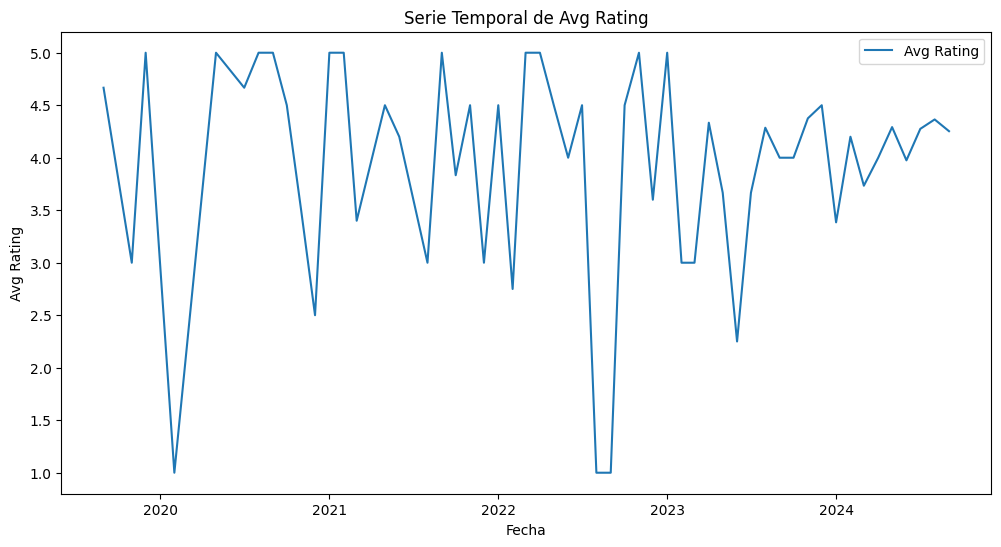

In [16]:
import matplotlib.pyplot as plt


# Graficar la serie temporal de avg_rating
plt.figure(figsize=(12, 6))
plt.plot(metrics_per_month['fecha'], metrics_per_month['avg_rating'], label='Avg Rating')
plt.title('Serie Temporal de Avg Rating')
plt.xlabel('Fecha')
plt.ylabel('Avg Rating')
plt.legend()
plt.show()



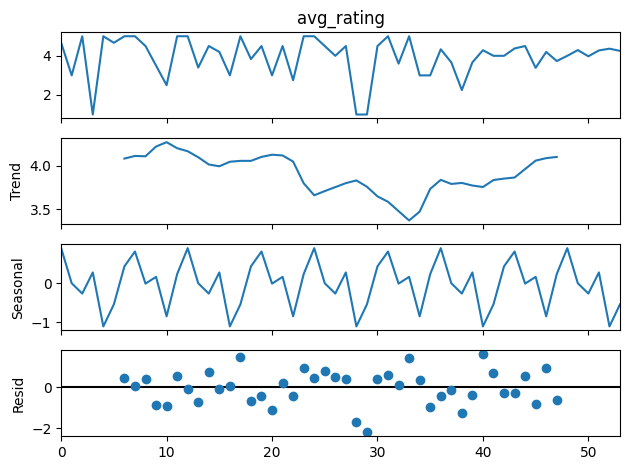

ADF Statistic: -3.011093445626101
p-value: 0.03387131934014944
Critical Values: {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}


In [7]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
# Aplicar técnicas de suavizado
result = seasonal_decompose(metrics_per_month['avg_rating'], model='additive', period=12)
result.plot()
plt.show()

# Prueba de Dickey-Fuller aumentada
adf_test = adfuller(metrics_per_month['avg_rating'])
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
print('Critical Values:', adf_test[4])

  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 12.6 MB/s eta 0:00:00a 0:00:01
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorizar las reseñas procesadas para análisis de frecuencias de palabras clave
vectorizer = CountVectorizer(stop_words=None)  # Cambiado de 'spanish' a None
dtm = vectorizer.fit_transform(data['tk_review'])

# Crear un DataFrame con las frecuencias de palabras
word_freq = pd.DataFrame({
    'palabra': vectorizer.get_feature_names_out(),
    'frecuencia': dtm.sum(axis=0).A1
}).sort_values(by='frecuencia', ascending=False)

# Verificar las palabras más frecuentes
word_freq.head(10)

,palabra,frecuencia
2244,phone,1241
2442,read,604
377,battery,448
1655,iphone,408
2038,new,345
2684,scratch,242
1406,great,239
696,condition,233
1382,good,222
2112,one,222


In [11]:
from sklearn.decomposition import LatentDirichletAllocation

# Configurar y entrenar el modelo LDA para identificar tópicos
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Mostrar los tópicos detectados
topics = {}
for topic_idx, topic in enumerate(lda.components_):
    topics[topic_idx] = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]
    print(f"Tópico {topic_idx}: {topics[topic_idx]}")


Tópico 0: ['phone', 'iphone', 'battery', 'read', 'new', 'apple', 'amazon', 'pro', 'great', 'max']
Tópico 1: ['phone', 'read', 'battery', 'scratch', 'new', 'condition', 'seller', 'iphone', 'screen', 'brand']
Tópico 2: ['phone', 'read', 'great', 'battery', 'good', 'came', 'condition', 'work', 'new', 'screen']
Tópico 3: ['phone', 'amazon', 'read', 'iphone', 'return', 'work', 'told', 'refund', 'took', 'apple']
Tópico 4: ['phone', 'iphone', 'like', 'screen', 'new', 'day', 'brand', 'money', 'read', 'buying']


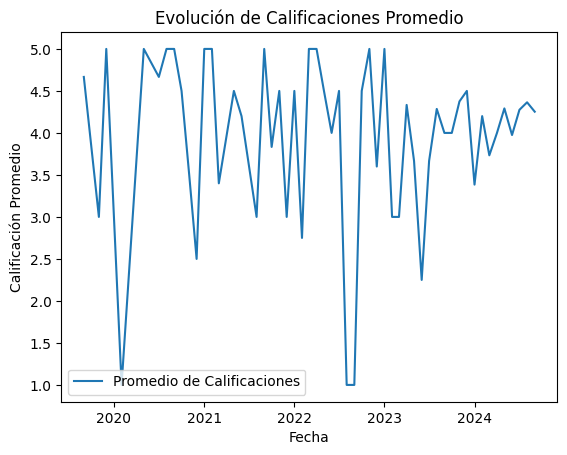

In [12]:
# Visualizar Promedio de Calificaciones por Mes
plt.plot(metrics_per_month['fecha'], metrics_per_month['avg_rating'], label='Promedio de Calificaciones')
plt.xlabel('Fecha')
plt.ylabel('Calificación Promedio')
plt.title('Evolución de Calificaciones Promedio')
plt.legend()
plt.show()


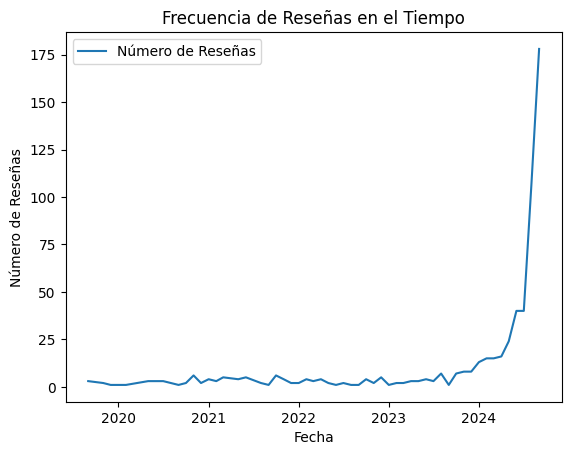

In [13]:
# Visualizar Número de Reseñas por Mes
plt.plot(metrics_per_month['fecha'], metrics_per_month['count_reviews'], label='Número de Reseñas')
plt.xlabel('Fecha')
plt.ylabel('Número de Reseñas')
plt.title('Frecuencia de Reseñas en el Tiempo')
plt.legend()
plt.show()


PART 3


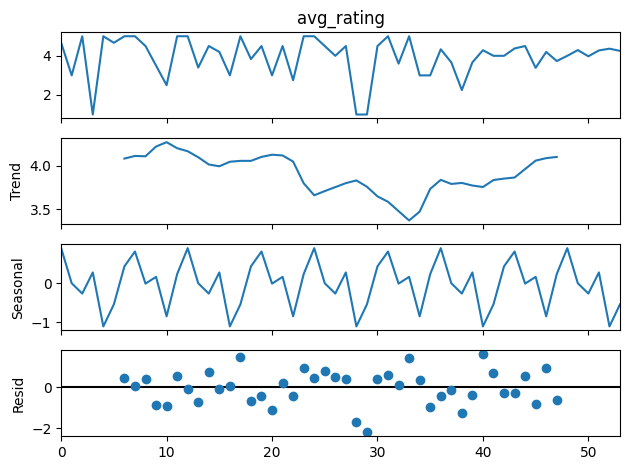

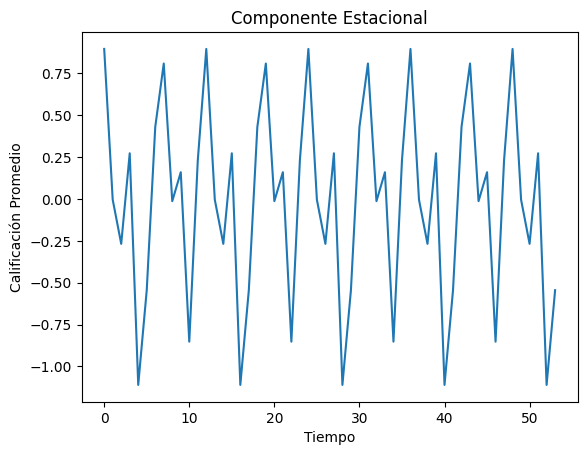

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Descomponer la serie temporal
result = seasonal_decompose(metrics_per_month['avg_rating'], model='additive', period=12)

# Visualizar los componentes
result.plot()
plt.show()

# Visualizar solo el componente estacional
plt.plot(result.seasonal)
plt.title('Componente Estacional')
plt.xlabel('Tiempo')
plt.ylabel('Calificación Promedio')
plt.show()


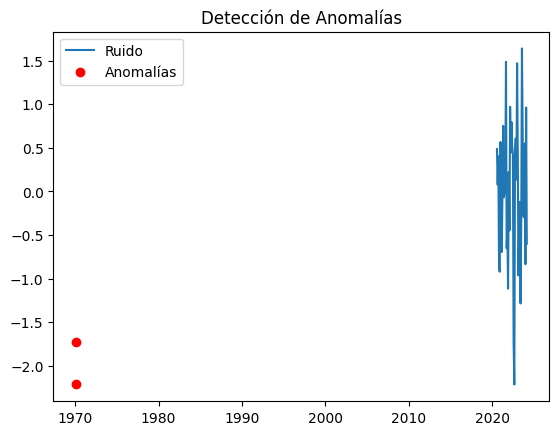

Outliers detectados: 28   -1.721197
29   -2.213690
Name: resid, dtype: float64


In [15]:
import numpy as np

# Calcular el umbral de anomalías basado en 2 desviaciones estándar
residual_std = np.std(result.resid.dropna())
outliers = result.resid[(result.resid > 2 * residual_std) | (result.resid < -2 * residual_std)]

# Visualizar las anomalías
plt.plot(metrics_per_month['fecha'], result.resid, label='Ruido')
plt.scatter(outliers.index, outliers, color='red', label='Anomalías')
plt.legend()
plt.title('Detección de Anomalías')
plt.show()

# Mostrar anomalías detectadas
print("Outliers detectados:", outliers)


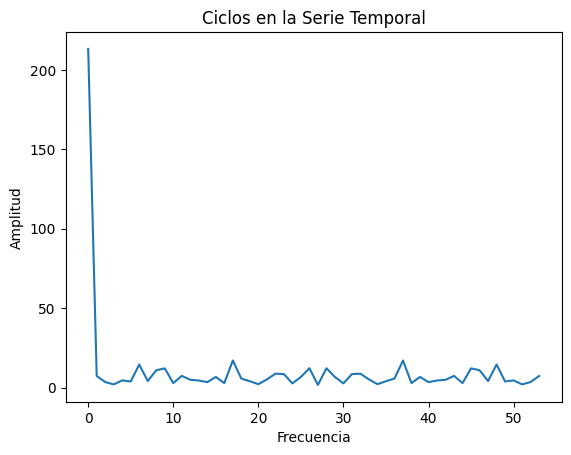

In [16]:
from scipy.fft import fft

# Aplicar la transformada de Fourier
fft_values = fft(metrics_per_month['avg_rating'].dropna())

# Visualizar los ciclos detectados
plt.plot(np.abs(fft_values))
plt.title('Ciclos en la Serie Temporal')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.show()


                                     SARIMAX Results                                      
Dep. Variable:                         avg_rating   No. Observations:                   54
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -538.234
Date:                            Tue, 19 Nov 2024   AIC                           1086.469
Time:                                    18:49:11   BIC                           1092.948
Sample:                                         0   HQIC                          1088.395
                                             - 54                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1197         -0       -inf      0.000       0.120       0.120
ma.L1         -0.7198         -0   

/Users/hugo/.pyenv/versions/3.11.8/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/hugo/.pyenv/versions/3.11.8/lib/python3.11/site-packages/statsmodels/tsa/statespace/mlemodel.py:3016: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
/Users/hugo/.pyenv/versions/3.11.8/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/var/folders/j6/s68ysphd2330y28yn3687q9r0000gn/T/ipykernel_36063/180460941.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=metrics_per_month['fecha'].iloc[-1], periods=future_step

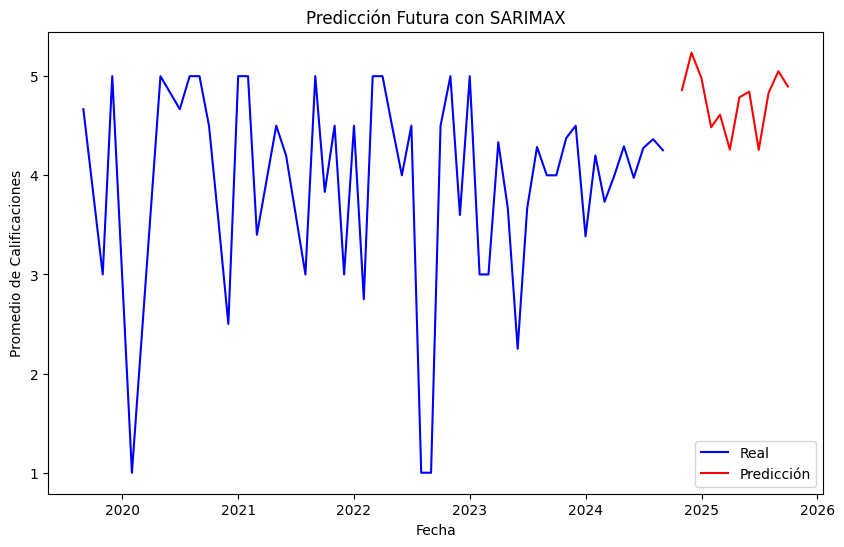

In [18]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Asegúrate de que metrics_per_month está definido correctamente
# Simula o carga tu DataFrame aquí si no lo tienes
# metrics_per_month = pd.read_csv('ruta_a_tu_dataset.csv')  # Descomenta si necesitas cargar el dataset

# Preparar los datos
metrics_per_month['fecha'] = pd.to_datetime(metrics_per_month['fecha'])
y = metrics_per_month['avg_rating']  # Promedio de calificaciones

# Configurar el modelo SARIMAX
sarimax_model = SARIMAX(
    y,
    order=(1, 1, 1),  # (p, d, q)
    seasonal_order=(1, 1, 1, 12),  # (P, D, Q, S) para datos estacionales
    enforce_stationarity=False,
    enforce_invertibility=False,
)

# Ajustar el modelo
sarimax_results = sarimax_model.fit(disp=False)

# Resumen del modelo
print(sarimax_results.summary())

# Validación del modelo: Últimos 10 puntos
y_test = y[-10:]  # Valores reales de prueba
y_pred = sarimax_results.get_prediction(start=len(y) - 10, end=len(y) - 1).predicted_mean

# Calcular el error RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Error RMSE: {rmse}")

# Predicción a futuro
future_steps = 12  # Número de meses a predecir
forecast = sarimax_results.get_forecast(steps=future_steps)
forecast_index = pd.date_range(start=metrics_per_month['fecha'].iloc[-1], periods=future_steps + 1, freq='M')[1:]
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.plot(metrics_per_month['fecha'], y, label='Real', color='blue')
plt.plot(forecast_series, label='Predicción', color='red')
plt.xlabel('Fecha')
plt.ylabel('Promedio de Calificaciones')
plt.title('Predicción Futura con SARIMAX')
plt.legend()
plt.show()


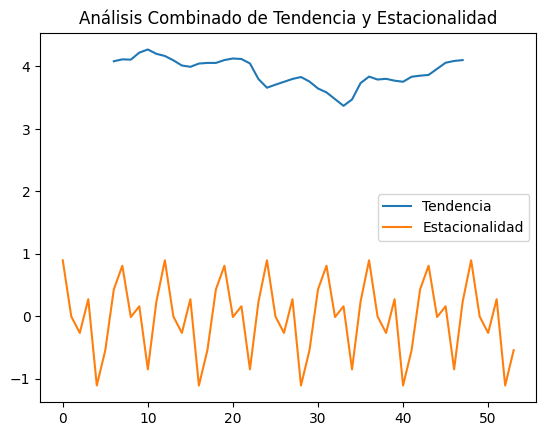

In [20]:
# Tendencia vs Estacionalidad
plt.plot(result.trend, label='Tendencia')
plt.plot(result.seasonal, label='Estacionalidad')
plt.legend()
plt.title('Análisis Combinado de Tendencia y Estacionalidad')
plt.show()
